# Dataset Exploration

### Date: May 05, 2021
### Shivam Verma 
#### Research scholar, Dept. of Physics, RKMVERI

## Importing basic packages 

In [1]:
import numpy as np  
import matplotlib.pyplot as plt
import pandas as pd
import h5py                      #To read the data file
%matplotlib inline

## Importing data

In [2]:
!git clone https://github.com/shivamv1/RKM_MLS_proj.git

fatal: destination path 'RKM_MLS_proj' already exists and is not an empty directory.


In [3]:
ipdir = "RKM_MLS_proj/Data/JetDataset"
! ls RKM_MLS_proj/Data/JetDataset/

jetImage_7_100p_0_10000.h5	jetImage_7_100p_50000_60000.h5
jetImage_7_100p_10000_20000.h5	jetImage_7_100p_60000_70000.h5
jetImage_7_100p_30000_40000.h5	jetImage_7_100p_70000_80000.h5
jetImage_7_100p_40000_50000.h5	jetImage_7_100p_80000_90000.h5


In [4]:
ip = '%s/jetImage_7_100p_30000_40000.h5' %ipdir 
f = h5py.File(ip)
print(list(f.keys())) #shows the contents of the file

['jetConstituentList', 'jetFeatureNames', 'jetImage', 'jetImageECAL', 'jetImageHCAL', 'jets', 'particleFeatureNames']


In [5]:
featurenames = f.get('jetFeatureNames')
print(featurenames[:])
print('Dataset shape:',featurenames.shape[0])

[b'j_ptfrac' b'j_pt' b'j_eta' b'j_mass' b'j_tau1_b1' b'j_tau2_b1'
 b'j_tau3_b1' b'j_tau1_b2' b'j_tau2_b2' b'j_tau3_b2' b'j_tau32_b1'
 b'j_tau32_b2' b'j_zlogz' b'j_c1_b0' b'j_c1_b1' b'j_c1_b2' b'j_c2_b1'
 b'j_c2_b2' b'j_d2_b1' b'j_d2_b2' b'j_d2_a1_b1' b'j_d2_a1_b2' b'j_m2_b1'
 b'j_m2_b2' b'j_n2_b1' b'j_n2_b2' b'j_tau1_b1_mmdt' b'j_tau2_b1_mmdt'
 b'j_tau3_b1_mmdt' b'j_tau1_b2_mmdt' b'j_tau2_b2_mmdt' b'j_tau3_b2_mmdt'
 b'j_tau32_b1_mmdt' b'j_tau32_b2_mmdt' b'j_c1_b0_mmdt' b'j_c1_b1_mmdt'
 b'j_c1_b2_mmdt' b'j_c2_b1_mmdt' b'j_c2_b2_mmdt' b'j_d2_b1_mmdt'
 b'j_d2_b2_mmdt' b'j_d2_a1_b1_mmdt' b'j_d2_a1_b2_mmdt' b'j_m2_b1_mmdt'
 b'j_m2_b2_mmdt' b'j_n2_b1_mmdt' b'j_n2_b2_mmdt' b'j_mass_trim'
 b'j_mass_mmdt' b'j_mass_prun' b'j_mass_sdb2' b'j_mass_sdm1'
 b'j_multiplicity' b'j_g' b'j_q' b'j_w' b'j_z' b'j_t' b'j_undef']
Dataset shape: 59


In [6]:
jet_data = np.array(f.get('jets'))
targetpre = jet_data[:,-7:-1]
target = jet_data[:,-6:-1]
print("Dataset shape:",target.shape)
print("First five entries:")
for i in range(5):
    print(targetpre[i])

Dataset shape: (10000, 5)
First five entries:
[85.  1.  0.  0.  0.  0.]
[59.  1.  0.  0.  0.  0.]
[94.  0.  0.  0.  0.  1.]
[102.   1.   0.   0.   0.   0.]
[52.  0.  0.  0.  1.  0.]


#### Ignore the first entry (it represents one of the features that was seen above particularly, it represents j_multiplicity i.e. jet multiplicity), The last 5 entries define the type of particle. Let's see what the last 5 entries represents
- [1, 0, 0, 0, 0] for gluons
- [0, 1, 0, 0, 0] for quarks
- [0, 0, 1, 0, 0] for Ws
- [0, 0, 0, 1, 0] for Zs
- [0, 0, 0, 0, 1] for Top


In [7]:
data = np.array(jet_data[:,:-6]) #isolating the entries with jet features
print(data.shape)

(10000, 53)


In [8]:
labelCat= ["gluon", "quark", "W", "Z", "top"]
def makePlot(feature_index, input_data, input_featurenames):
    plt.subplots()
    for i in range(len(labelCat)):
        my_data = input_data[np.argmax(target, axis=1) == i]
        plt.hist(my_data[:,feature_index], 50, density=True, histtype='step', fill=False, linewidth=1.5)
    plt.yscale('log')    
    plt.legend(labelCat, fontsize=12, frameon=False)  
    plt.xlabel(str(input_featurenames[feature_index], "utf-8"), fontsize=15)
    plt.ylabel('Probab. Density', fontsize=15)
    plt.show()

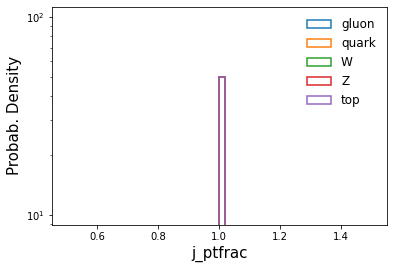

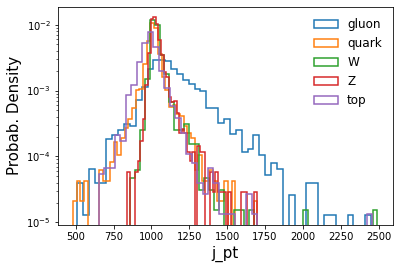

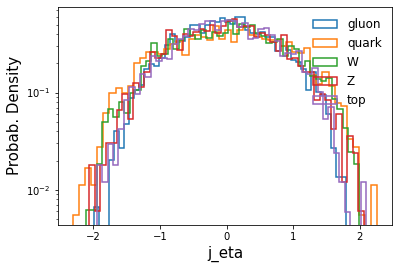

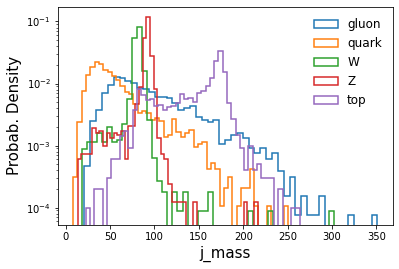

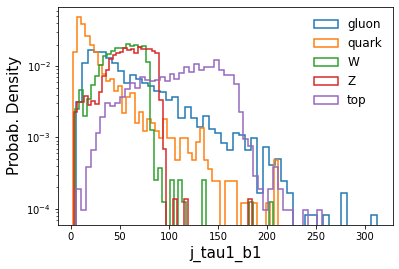

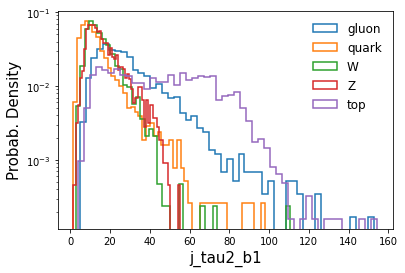

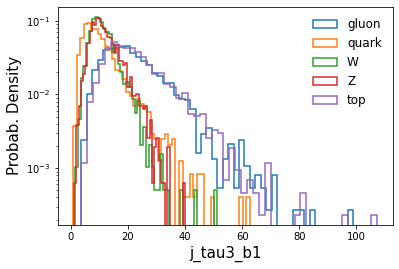

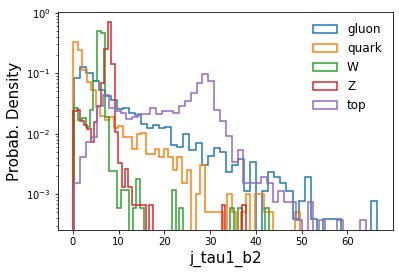

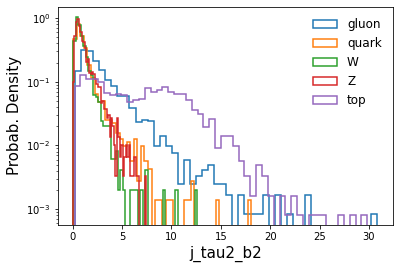

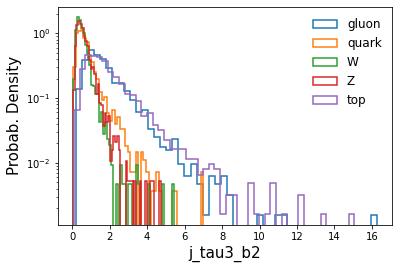

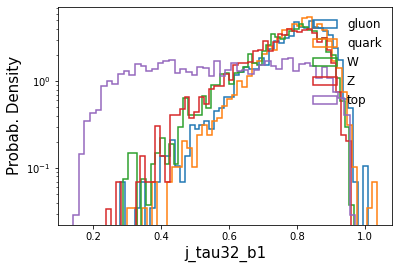

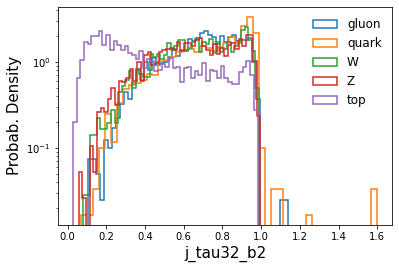

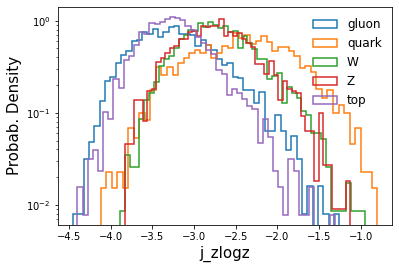

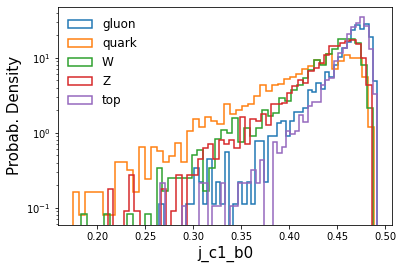

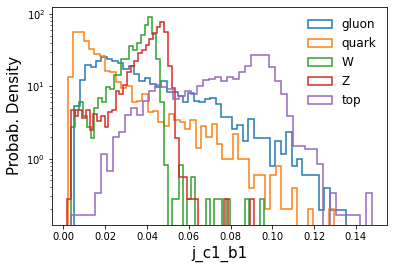

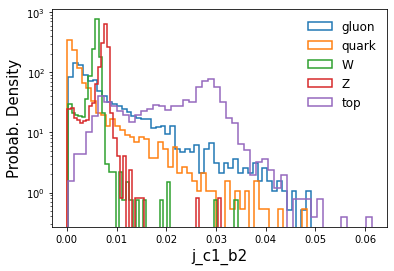

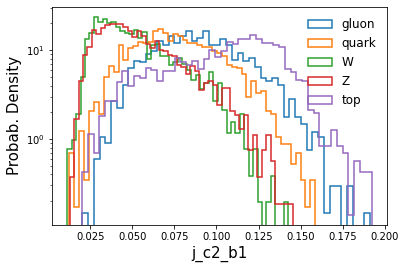

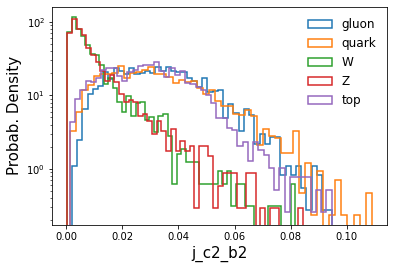

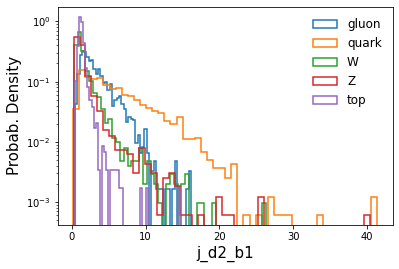

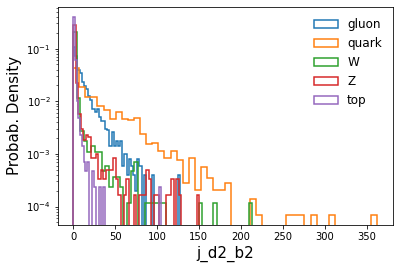

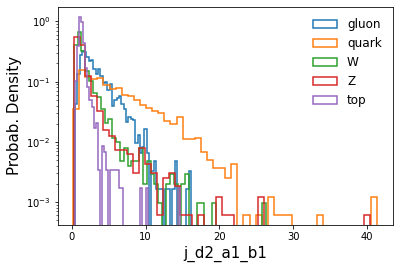

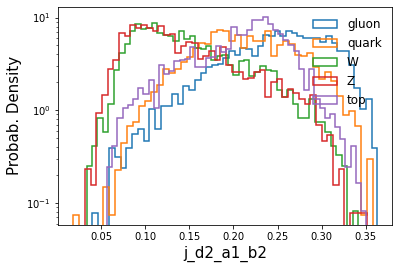

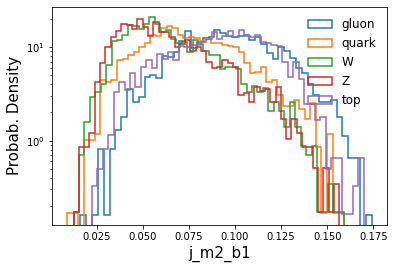

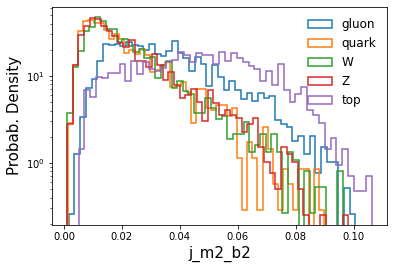

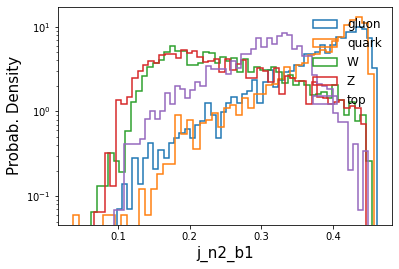

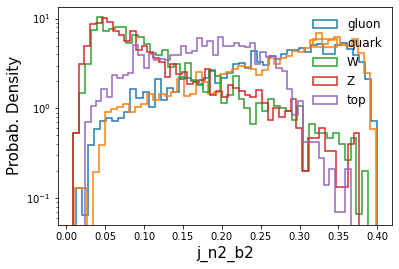

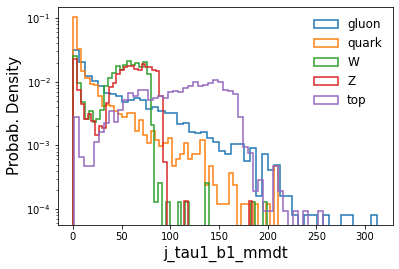

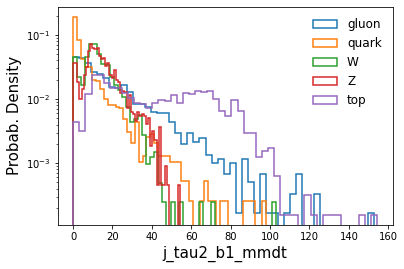

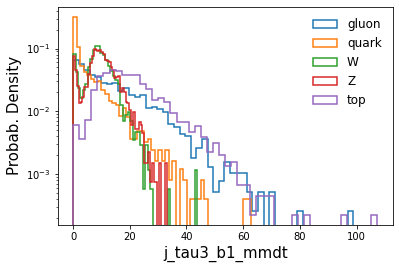

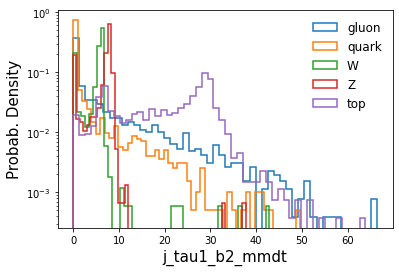

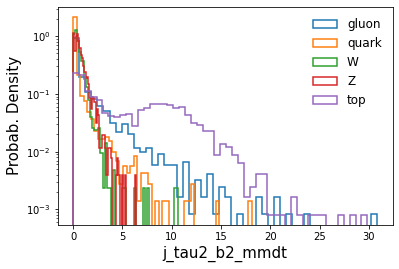

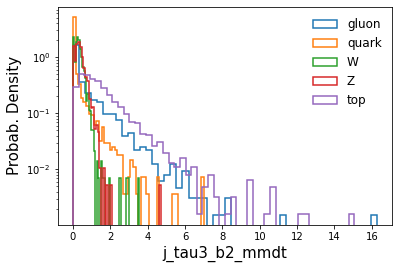

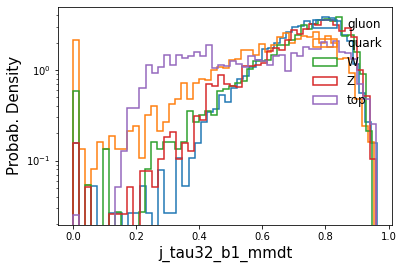

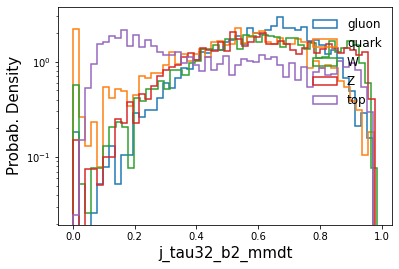

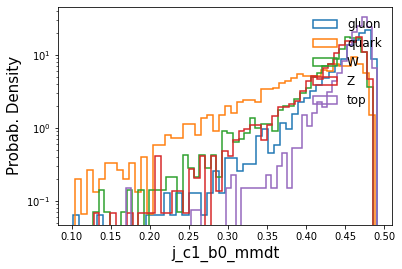

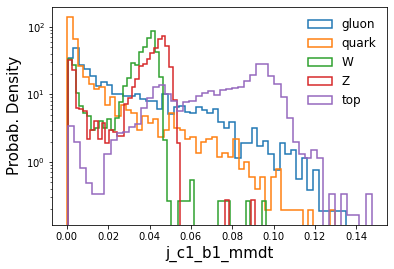

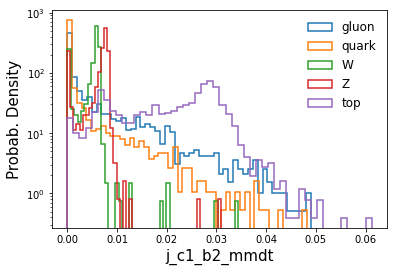

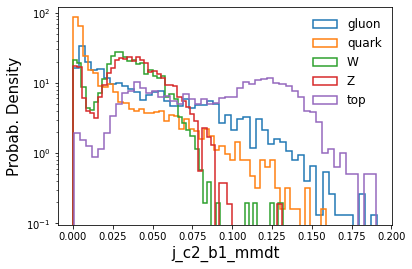

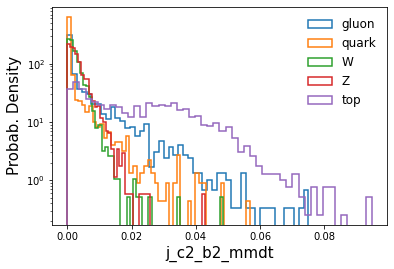

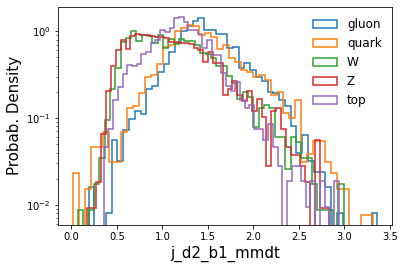

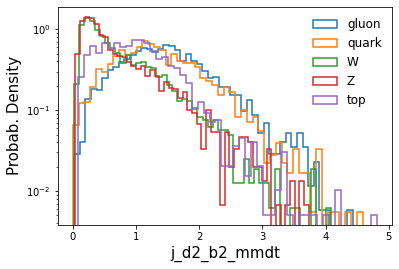

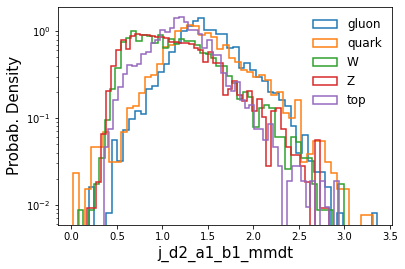

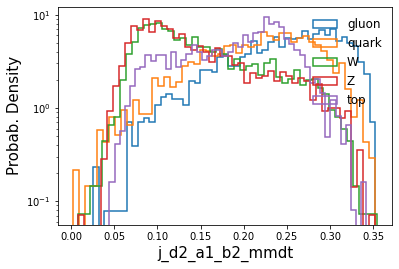

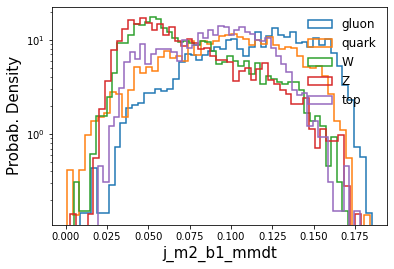

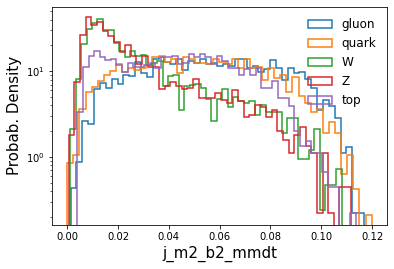

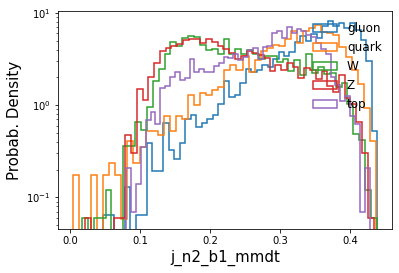

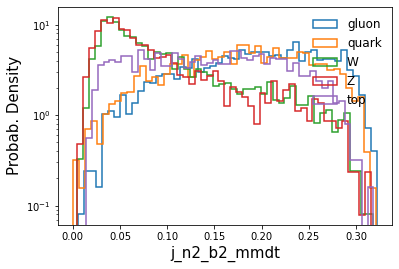

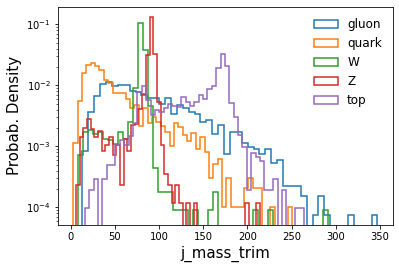

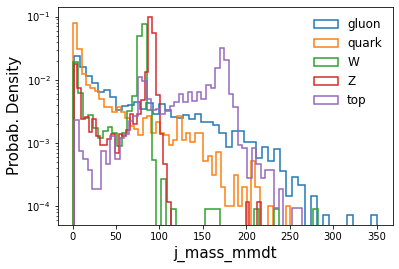

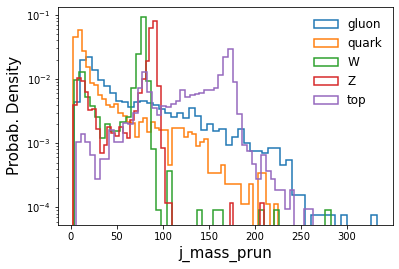

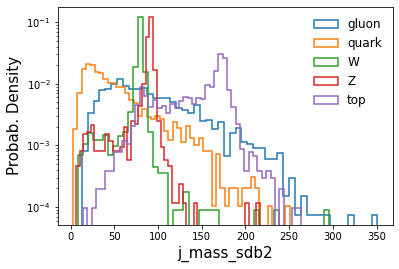

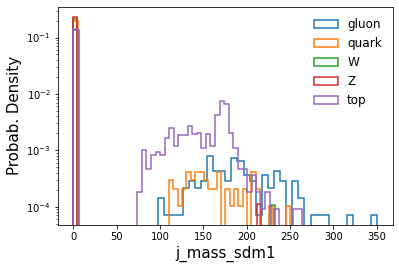

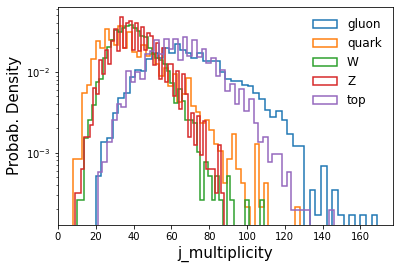

In [9]:
for i in range(len(featurenames[:-6])):
    makePlot(i, data, featurenames)

# Image dataset

In [15]:
! sudo apt-get install texlive-latex-recommended 
! sudo apt install texlive-latex-extra
! sudo apt install dvipng

Reading package lists... Done
Building dependency tree       
Reading state information... Done
texlive-latex-recommended is already the newest version (2017.20180305-1).
texlive-latex-recommended set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  fonts-lato fonts-texgyre javascript-common libjs-jquery libruby2.5
  preview-latex-style rake ruby ruby-did-you-mean ruby-minitest
  ruby-net-telnet ruby-power-assert ruby-test-unit ruby2.5
  rubygems-integration tex-gyre texlive-fonts-recommended texlive-pictures
  texlive-plain-generic tipa
Suggested packages:
  apache2 | lighttpd | httpd ri ruby-dev bundler texlive-fonts-recommended-doc
  python-pygments icc-profiles libfile-which-perl
  libspreadsheet-parseexcel-perl texlive-latex-extra-doc dot2tex prerex
  ruby-tcltk | libtcltk-ruby texlive-pictures-

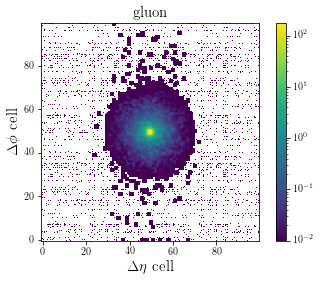

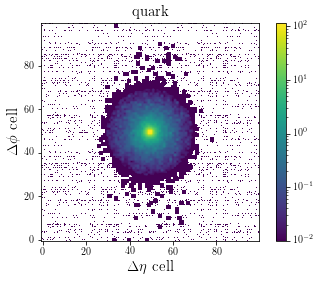

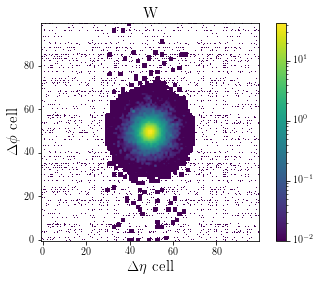

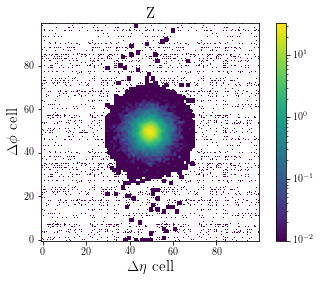

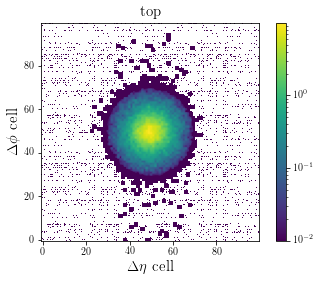

In [16]:
from matplotlib.colors import LogNorm
labelCat= ["gluon", "quark", "W", "Z", "top"]
image = np.array(f.get('jetImage'))
image_g = image[np.argmax(target, axis=1) == 0]
image_q = image[np.argmax(target, axis=1) == 1]
image_W = image[np.argmax(target, axis=1) == 2]
image_Z = image[np.argmax(target, axis=1) == 3]
image_t = image[np.argmax(target, axis=1) == 4]
images = [image_q, image_g, image_W, image_Z, image_t]
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
for i in range(len(images)):
    SUM_Image = np.sum(images[i], axis = 0)
    plt.imshow(SUM_Image/float(images[i].shape[0]), origin='lower',norm=LogNorm(vmin=0.01))
    plt.colorbar()
    plt.title(labelCat[i], fontsize=15)
    plt.xlabel("$\Delta\eta$ cell", fontsize=15)
    plt.ylabel("$\Delta\phi$ cell", fontsize=15)
    plt.show()